# BASIC PUBLICATION ANALYSIS

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../outputs/citations.tsv", \
                 sep="\t", header=None)
df.columns = ['nsfid', 'doi', 'cites']

In [3]:
df.doi = df.doi.str.lower()
df_clean = df.drop_duplicates(subset='doi')
df_clean = df_clean.query('cites>-1')

In [4]:
df_clean.cites.describe()

count    245.000000
mean      18.126531
std       43.525717
min        0.000000
25%        2.000000
50%        6.000000
75%       17.000000
max      388.000000
Name: cites, dtype: float64

In [5]:
total_citations = df_clean.cites.sum()
total_citations

4441

In [6]:
df_clean.head()

,nsfid,doi,cites
0,1324760,10.1016/j.geomorph.2015.03.039,19
2,1324760,10.2110/sedred.2013.4.9,2
3,1324760,10.2110/sedred.2013.4,0
4,1324760,10.1029/2021ef002088,0
5,1324760,10.1029/2017jf004576,10


In [7]:
df_clean.sort_values(by='cites', ascending=False)[:10]['cites'].sum() / total_citations

0.4217518576897095

In [8]:
df_clean.sort_values(by='cites', ascending=False)[:1]

,nsfid,doi,cites
153,1541039,10.1080/17538947.2016.1239771,388


## Citations without cite data

These are the citations to watch for as they may have a problem or be in DataCite.  The [notebook here](./01_basic_datacite_analysis.ipynb) explores these further.

In [9]:
df.query("cites <0")

,nsfid,doi,cites
117,1440351,10.1594/ieda/100709,-1
118,1440351,10.1594/ieda/100691,-1
121,1440351,10.6084/m9.figshare.4272164.v1,-1
205,1541390,10.18739/a24m9198b,-1
220,1639683,10.6084/m9.figshare.14848713.v1,-1
253,1639759,10.5555/3319379.3319381,-1
261,1639764,10.1594/pangaea.892680,-1
262,1639557,10.1594/pangaea.892680,-1
323,1928406,10.5281/zenodo.5496306,-1
350,1440066,10.13140/rg.2.1.4908.4561,-1


### TOP 10 MOST CITED PAPERS

In [10]:
import json
json_nsf = json.load(open("../outputs/full_data_map.json"))

In [11]:
df_json = pd.DataFrame(columns=['doi', 'ams_bib'])

for k in json_nsf.keys():
    for r in json_nsf[k]:
        if r['doi'] and r.get('ams_bib'):
            df_json = pd.concat([df_json, pd.DataFrame([[r['doi'], r['ams_bib'].strip()]], columns=['doi', 'ams_bib'])], axis=0)

df_json = df_json.reset_index().drop('index', axis=1).drop_duplicates()
df_json.doi = df_json.doi.str.lower()

In [12]:
all_cites = \
    df\
    .drop_duplicates(subset='doi')\
    .sort_values(by='cites', ascending=False)[:]\
    [['doi', 'cites']]

In [13]:
top10_most_cites = \
    df\
    .drop_duplicates(subset='doi')\
    .sort_values(by='cites', ascending=False)[:10]\
    [['doi', 'cites']]

In [14]:
top10_most_cites

,doi,cites
153,10.1080/17538947.2016.1239771,388
204,10.1002/2017gl074954,364
212,10.1038/nbt.4306,247
143,10.1038/sdata.2017.88,192
229,10.1016/j.renene.2017.02.052,145
125,10.1017/qua.2017.105,143
156,10.1016/j.compenvurbsys.2016.10.010,115
124,10.1093/biosci/biy068,102
100,10.1002/2015ea000136,98
27,10.2134/jeq2014.05.0220,79


In [15]:
df_citations = pd.read_csv("../outputs/full_nsf_doi_project_summary.tsv", sep='\t', header=None)

df_citations = df_citations[[1,3]]
df_citations = df_citations.drop_duplicates()

df_citations.index = df_citations[1]
df_citations = df_citations.drop(1, axis=1)

df_citations.columns = ['citation']

In [16]:
top10_most_cites.reset_index()# = top10_most_cites

,index,doi,cites
0,153,10.1080/17538947.2016.1239771,388
1,204,10.1002/2017gl074954,364
2,212,10.1038/nbt.4306,247
3,143,10.1038/sdata.2017.88,192
4,229,10.1016/j.renene.2017.02.052,145
5,125,10.1017/qua.2017.105,143
6,156,10.1016/j.compenvurbsys.2016.10.010,115
7,124,10.1093/biosci/biy068,102
8,100,10.1002/2015ea000136,98
9,27,10.2134/jeq2014.05.0220,79


In [17]:
top10_most_cites.index = top10_most_cites.doi
top10_most_cites = top10_most_cites.drop(['doi'], axis=1)
top10_merged = \
    top10_most_cites.merge(df_citations, left_index=True, right_index=True)\
            [['cites', 'citation']]

top10_merged.index.set_names('DOI')
with open("../outputs/top10_pubs_simple.md", "w", encoding='utf-8') as fo:
    fo.write( 
        top10_merged.to_markdown(index=True)
    )

top10_merged.to_csv("../outputs/top10_pubs_simple.csv", index=False)

In [18]:
all_cites.index = all_cites.doi
all_cites = all_cites.drop(['doi'], axis=1)
all_cites_merged = \
    all_cites.merge(df_citations, left_index=True, right_index=True)\
            [['cites', 'citation']]

with open("../outputs/all_pubs_simple.md", "w", encoding='utf-8') as fo:
    fo.write( 
        all_cites_merged.to_markdown(index=False)
    )
    
all_cites_merged.to_csv("../outputs/all_pubs_simple.csv", index=False)

### PUBLICATION FREQUENCY COUNTS

In [19]:
# graph
df = pd.read_csv("../outputs/full_nsf_doi_project_summary.tsv",sep='\t').query('cites>-1')\
    .drop_duplicates(subset='doi')

In [20]:
df.cites.value_counts().sort_index()[10:].sum()

92

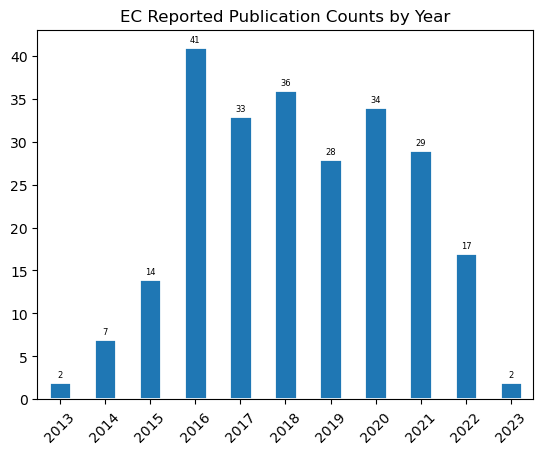

In [21]:
ax = df.query('year != "None"').year.value_counts().sort_index()\
    .plot.bar(rot=45, title='EC Reported Publication Counts by Year', edgecolor='white', linewidth=2)

for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)
    
ax.get_figure().savefig("../outputs/fig_publications_by_year.png", dpi=300)

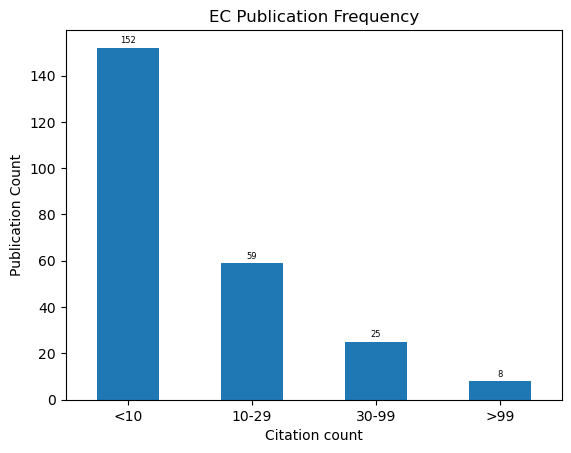

In [22]:
ax = pd.cut(df.cites, [-1,9,30,100,1000], labels=["<10","10-29", "30-99", ">99"])\
    .value_counts().sort_index()\
    .plot.bar(rot=0, xlabel="Citation count", ylabel="Publication Count", title="EC Publication Frequency")

for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)
    
ax.get_figure().savefig("../outputs/fig_publications_citation_density.png", dpi=300)